In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import re

tqdm.pandas()

/home/aaoganov/.conda/envs/nlp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = "./data/hye_wikipedia_2021_1M/hye_wikipedia_2021_1M-sentences.txt"

## Base stats

In [3]:
with open(data_path, encoding='utf-8') as f:
    text = f.read()

chars = sorted(list(set(text)))
vocab_size = len(chars)

print(f"The corpus contains {vocab_size} unique characters.")
print("Character vocabulary:")
print(''.join(chars))

The corpus contains 2322 unique characters.
Character vocabulary:
	
 !"$%&'()*+,-./0123456789:;<>?ABCDEFGHIJKLMNOPQRSTUVWXYZ`abcdefghijklmnopqrstuvwxyz~¡¢£¥¦§¨ª«¬®°±²³´µ·¹º»¼½¾¿ÀÁÄÅÆÇÈÉÍÎÏÓÔÕÖ×ØÚÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿĀāăąćČčďĐđĒēĕĖėęĚěĝĞğġģĦħĪīĭİıķĻļľŁłńŅņňŋŌōŏőœřŚśŞşŠšŢţťŨũūŭůűųŹźŻżŽžƆƏƒơưǀǁǎǐǒǔǰȘșțȝɑɒɔəɛɡɣɪɲʊʌʎʒʟʰʷʻʾʿˇˈˋː˙˚̧̣̩̯̱̀́̈̕΄ΆΈΉΊΌΑΒΓΔΕΖΗΘΙΚΛΜΝΞΟΠΡΣΤΥΦΧΨΩάέήίαβγδεζηθικλμνξοπρςστυφχψωϊόύώϘϜϝϩϰЁЂІЈЉЋАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяёђѓєіїјљњћќўџѣғҕҗҚқңҦҮүҰҷһӑӘәӣӨөӯӲԱԲԳԴԵԶԷԸԹԺԻԼԽԾԿՀՁՂՃՄՅՆՇՈՉՊՋՌՍՎՏՐՑՒՓՔՕՖՙ՚՛՜՝՞աբգդեզէըթժիլխծկհձղճմյնշոչպջռսվտրցւփքօֆև։֊֏ְֲִֵֶַָֹֻּׁׂאבגדהוזחטיךכלםמןנסעפץצקרשת׳،؛ءآأؤإئابةتثجحخدذرزسشصضطظعغـفقكلمنهوىيٌَُِّْ٪٫ٱٴپچڈژکگھی۱۲۳۵۶۷۸۹ܐܓܕܘܛܝܟܠܡܢܣܦܪܬंअआकखगचछजटडणतथदनपभमयरलवशषसह़ािीुूृेो्ॐইকঠতমরাি্৳ஆஇஊஔதனமயளா்ംതഭമയലളാിൂൃกคงจชซตทนบพมยรลวศสหฮะัาิีเ่้๊์๐ກຄງຊດນບປພລວສຫະັາຽແ້་པལསུྤྲကခဂငဆညတထနပဘရသအါာိီုေဲံ့း္်ျြှႿაბგდევზთიკლმნოპრსტუფქღშჩცძწჭხჯჲሩተጋកគឃងចណតទធនពមរវសហីុៀេះ៍្ḏḢḥḫṃṇṓṛṢṣṭṯẓẚạấốồớờỡụửἀἄἅἈἌἐἑἔἘἙἜἡἨἩἭἰἱἴἵἷἸὀὁὄὅὐὑὕὙὠὡὢὤὰὴὶὸ

In [4]:
data_df = pd.read_csv(data_path, sep='\t', usecols=[1], names=['text'])

In [5]:
init_rows_number = len(data_df)
print(f"Rows number = {init_rows_number}")
data_df.head()

Rows number = 982422


,text
0,"՝ 0,017: Սովարաբար լինում է ուժեղ կամ հստակ ար..."
1,"՝ 0,03 %, այլ ռասաների ներկայացուցիչներ՝ 0,23 ..."
2,"` 0-15 տարեկան կազմում են 100, աշխատունակ տարի..."
3,"» (0-1) դեմ խաղերում, բայց այդ երկու խաղերում ..."
4,"» 0:1 հաշվով, իսկ երկրորդ խաղում պարտության է ..."


In [6]:
data_df.dropna(inplace=True)
data_df.drop_duplicates(inplace=True)

In [7]:
data_df['char_length'] = data_df['text'].str.len()
data_df['word_count'] = data_df['text'].str.split().str.len()

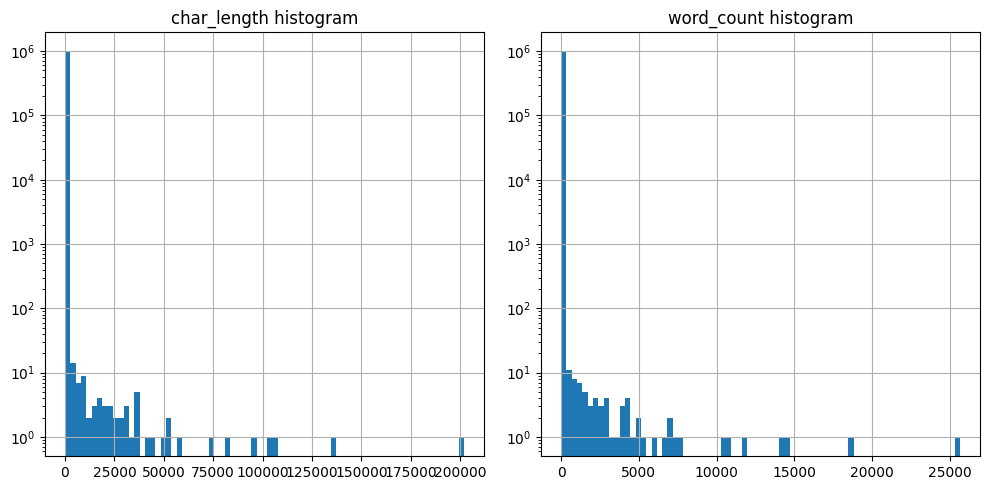

In [8]:
def vis_char_word_hist(data_df, k1, k2):

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist(data_df[k1], bins=75)
    ax[0].set_title(f'{k1} histogram')

    ax[1].hist(data_df[k2], bins=75)
    ax[1].set_title(f'{k2} histogram')

    for a in ax:
        a.grid()
        a.set_yscale('log')

    plt.tight_layout()
    plt.show()
    
vis_char_word_hist(data_df, 'char_length', 'word_count')

## Clean text

In [9]:

# Use LLM with promt and fix

def clean_text(text):
    # Remove Wikipedia specific markup
    text = re.sub(r'\[\[[^]]*?\|([^]]*?)\]\]', r'\1', text)  # Remove piped links but keep display text
    text = re.sub(r'\[\[([^]]*?)\]\]', r'\1', text)  # Remove non-piped links but keep text
    text = re.sub(r'\{\{.*?\}\}', '', text)  # Remove templates
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'\[[^\]]*\]', '', text)  # Remove external links and references
    text = re.sub(r'\{\|[^}]*\|\}', '', text)  # Remove tables
    text = re.sub(r"'''+", '', text)  # Remove bold/italic markup
    text = re.sub(r'http\S+|www\S+', '', text) # Remove hhtp/www
    
    # Remove file and category links
    text = re.sub(r'\[\[(Պատկեր|File|Image|Կատեգորիա|Category):[^]]*\]\]', '', text)
    
    # Remove section headers
    text = re.sub(r'=+\s*(.*?)\s*=+', r'\1', text)
    
    # Remove reference tags
    text = re.sub(r'<ref[^>]*>.*?</ref>', '', text, flags=re.DOTALL)
    text = re.sub(r'<ref[^>]*/>', '', text)
    
    # Lower case
    text = text.lower()
    
    allowed_chars = r'|a-z|0-9|\u0561-\u0587|\s|\.|,|;|:|\?|!|\(|\)|—|-|"|\''
    text = re.sub(f'[^{allowed_chars}]', ' ', text)
    
    # Clean up whitespace
    text = re.sub(r'\n+', ' ', text)  # Replace multiple newlines with single newline
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    text = text.strip()
    
    return text

example_text = data_df.text[0] + "\n\n\n testing тестирование"
example_text

'՝ 0,017: Սովարաբար լինում է ուժեղ կամ հստակ արտահայտված պլեոքրոմիզմ։\n\n\n testing тестирование'

In [10]:
clean_text(example_text)

'0,017: սովարաբար լինում է ուժեղ կամ հստակ արտահայտված պլեոքրոմիզմ testing'

In [11]:
data_df['cleaned_text'] = data_df['text'].progress_apply(clean_text)

100%|██████████| 982422/982422 [00:24<00:00, 39358.20it/s]


In [12]:
data_df[['text', 'cleaned_text']].head(10)

,text,cleaned_text
0,"՝ 0,017: Սովարաբար լինում է ուժեղ կամ հստակ ար...","0,017: սովարաբար լինում է ուժեղ կամ հստակ արտա..."
1,"՝ 0,03 %, այլ ռասաների ներկայացուցիչներ՝ 0,23 ...","0,03 , այլ ռասաների ներկայացուցիչներ 0,23 , եր..."
2,"` 0-15 տարեկան կազմում են 100, աշխատունակ տարի...","0 15 տարեկան կազմում են 100, աշխատունակ տարիքի..."
3,"» (0-1) դեմ խաղերում, բայց այդ երկու խաղերում ...","(0 1) դեմ խաղերում, բայց այդ երկու խաղերում չկ..."
4,"» 0:1 հաշվով, իսկ երկրորդ խաղում պարտության է ...","0:1 հաշվով, իսկ երկրորդ խաղում պարտության է մա..."
5,"՝ 0,20-ից Ումբրիելի մոտ մինչև 0,35 Արիելի մոտ ։","0,20 ից ումբրիելի մոտ մինչև 0,35 արիելի մոտ"
6,"» 0-2 հաշվով, չնայած Ռոբերտոյի կարծիքով թիմը կ...","0 2 հաշվով, չնայած ռոբերտոյի կարծիքով թիմը կար..."
7,՝ 0.4 գ միանվագ՝ անհրաժեշտության դեպքում կրկնո...,0.4 գ միանվագ անհրաժեշտության դեպքում կրկնում ...
8,"՝ 0,5—13 կգ, ոտքերը կարճ, հաճախ նման են կզաքիս...","0,5—13 կգ, ոտքերը կարճ, հաճախ նման են կզաքիսազ..."
9,"՝ 0, 5-2 սմ) գլխարկի գույնի է, վերին մասում՝ լ...","0, 5 2 սմ) գլխարկի գույնի է, վերին մասում լայն..."


In [13]:
data_df['cleaned_char_length'] = data_df['cleaned_text'].str.len()
data_df['cleaned_word_count'] = data_df['cleaned_text'].str.split().str.len()

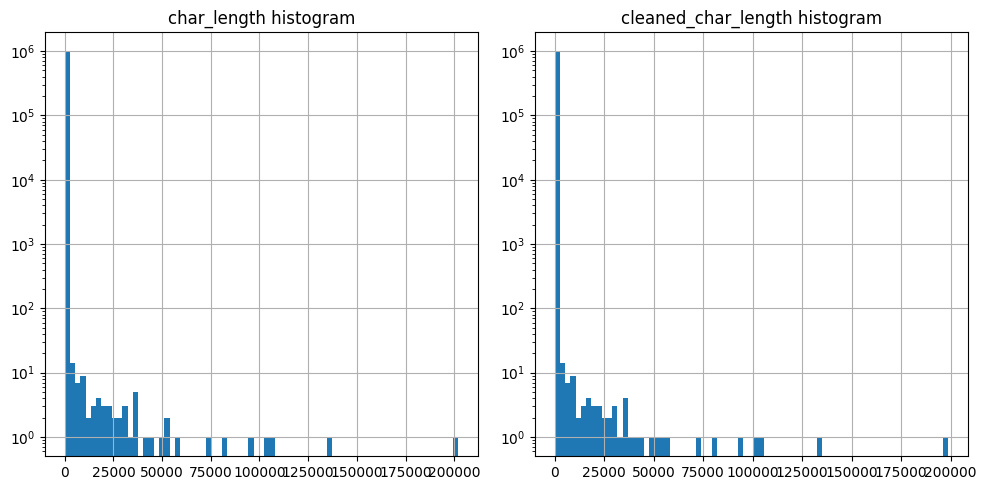

In [14]:
vis_char_word_hist(data_df, 'char_length', 'cleaned_char_length')

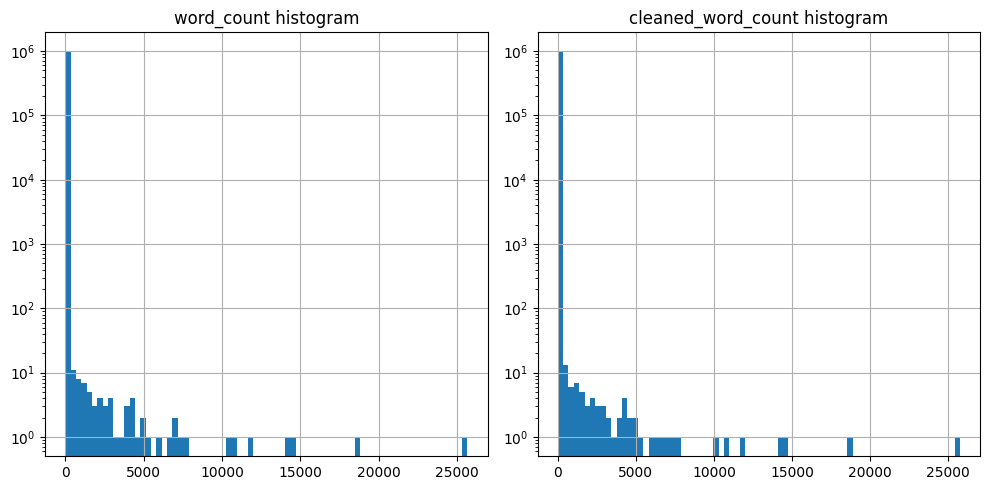

In [15]:
vis_char_word_hist(data_df, 'word_count', 'cleaned_word_count')

In [16]:
for q in [0.0001, 0.001, 0.01, 0.1]:
    print(f"Quantile {q} = {data_df['cleaned_word_count'].quantile(q)}")

Quantile 0.0001 = 2.0
Quantile 0.001 = 3.0
Quantile 0.01 = 4.0
Quantile 0.1 = 6.0


In [17]:
for q in [0.99, 0.999, 0.9999, 0.99999]:
    print(f"Quantile {q} = {data_df['cleaned_word_count'].quantile(q)}")

Quantile 0.99 = 33.0
Quantile 0.999 = 39.0
Quantile 0.9999 = 46.0
Quantile 0.99999 = 6907.901220002677


In [18]:
min_word_count = 4
data_df = data_df[data_df['cleaned_word_count'] >= min_word_count]
# max_word_count = 4096 # use if you want
# data_df = data_df[data_df['cleaned_word_count'] <= max_word_count]

clean_rows_number = len(data_df)
print(f"Rows number after clean = {init_rows_number}")
print(f"Delete = {init_rows_number - clean_rows_number}")

Rows number after clean = 982422
Delete = 4395


In [19]:
output_filename = './data/hye_wikipedia_2021_1M/cleaned_corpus_for_training.txt'
data_df['cleaned_text'].to_csv(output_filename, index=False, header=False)

In [20]:
with open(output_filename, encoding='utf-8') as f:
    text = f.read()

chars = sorted(list(set(text)))
vocab_size = len(chars)

print(f"The corpus contains {vocab_size} unique characters.")
print("Training character vocabulary:")
print(''.join(chars))

The corpus contains 88 unique characters.
Training character vocabulary:

 !"'(),.0123456789:;?abcdefghijklmnopqrstuvwxyzաբգդեզէըթժիլխծկհձղճմյնշոչպջռսվտրցւփքօֆև—
